# Experiment 3.2



In [81]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.11'

In [82]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [83]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.11_metrics.csv", index_col=0)

hpo_table["adamW"] = hpo_table["optim"].apply(lambda x: 1 if x == "adamW" else 0)

hpo_table["OneCycle"] = hpo_table["lradj"].apply(lambda x: 1 if x == "TST" else 0)

# Deal with NaN values
hpo_table["dropout"] = hpo_table["dropout"].apply(lambda x: 0.05 if pd.isna(x) else x)

def custom_function(row):
    if pd.isna(row['weight_decay']):
        if row['OneCycle']:
            return 0.01
        else:
            return 0.0
    return row['weight_decay']

hpo_table['weight_decay'] = hpo_table.apply(custom_function, axis=1)

hpo_table.drop(columns=["optim", "lradj"], inplace=True)

In [84]:
hpo_table.sum(axis=0)

learning_rate        0.032000
batch_size        1920.000000
e_layers           270.000000
d_layers            60.000000
d_model          11904.000000
seq_len          25440.000000
pred_len         11520.000000
dropout             12.000000
weight_decay         0.000000
MSE                  4.887608
MAE                 11.958215
Epochs            1991.000000
Time[min]         1409.000000
Params[Mio.]       273.420000
Max_mem[MB]      11603.270000
adamW                0.000000
OneCycle            60.000000
dtype: float64

<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

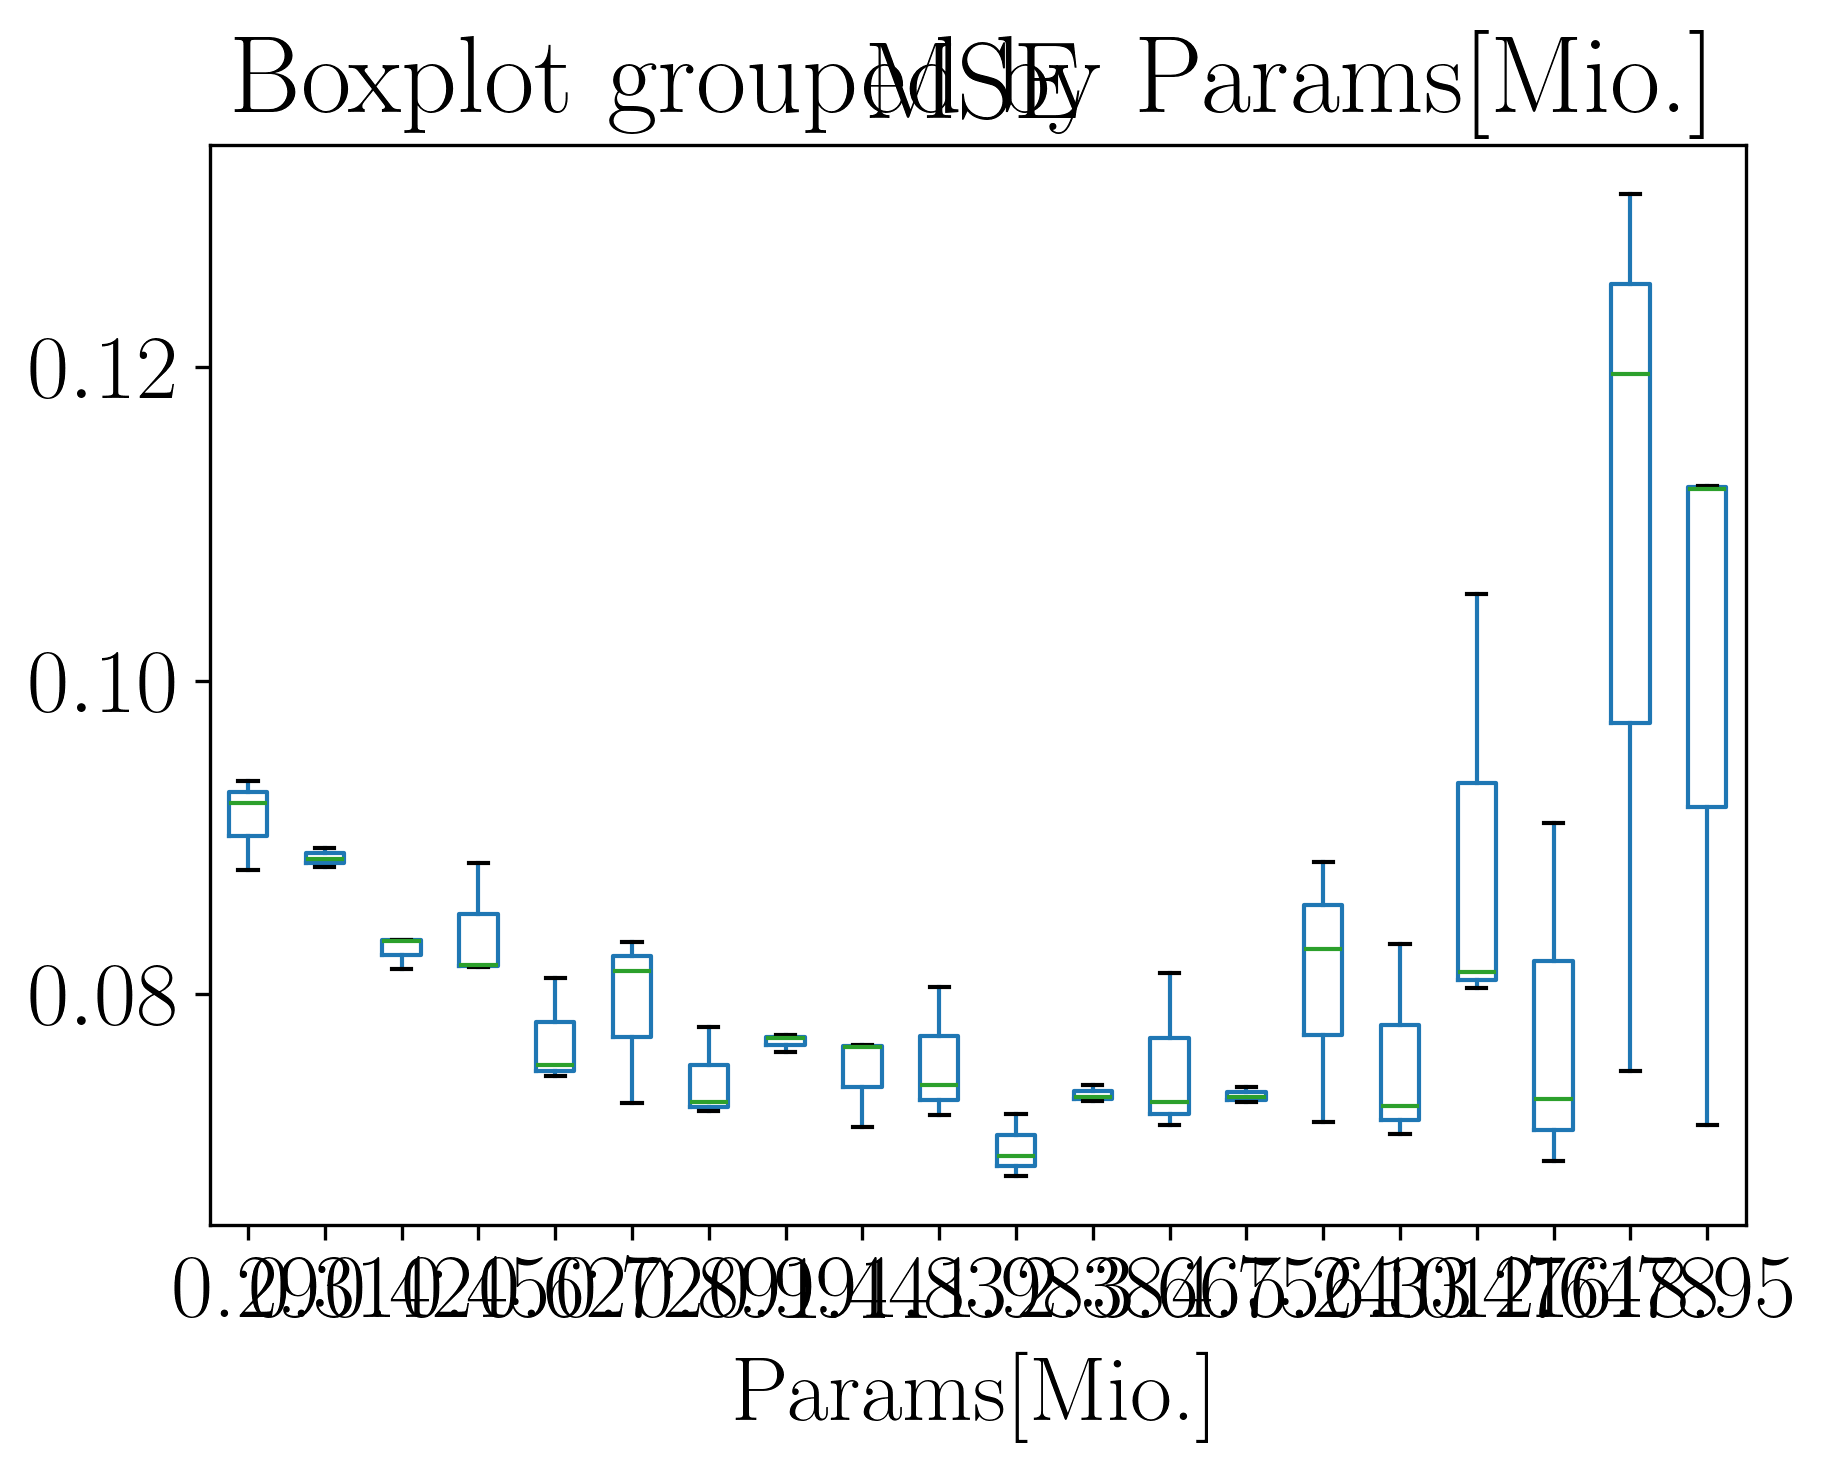

In [85]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

3
6


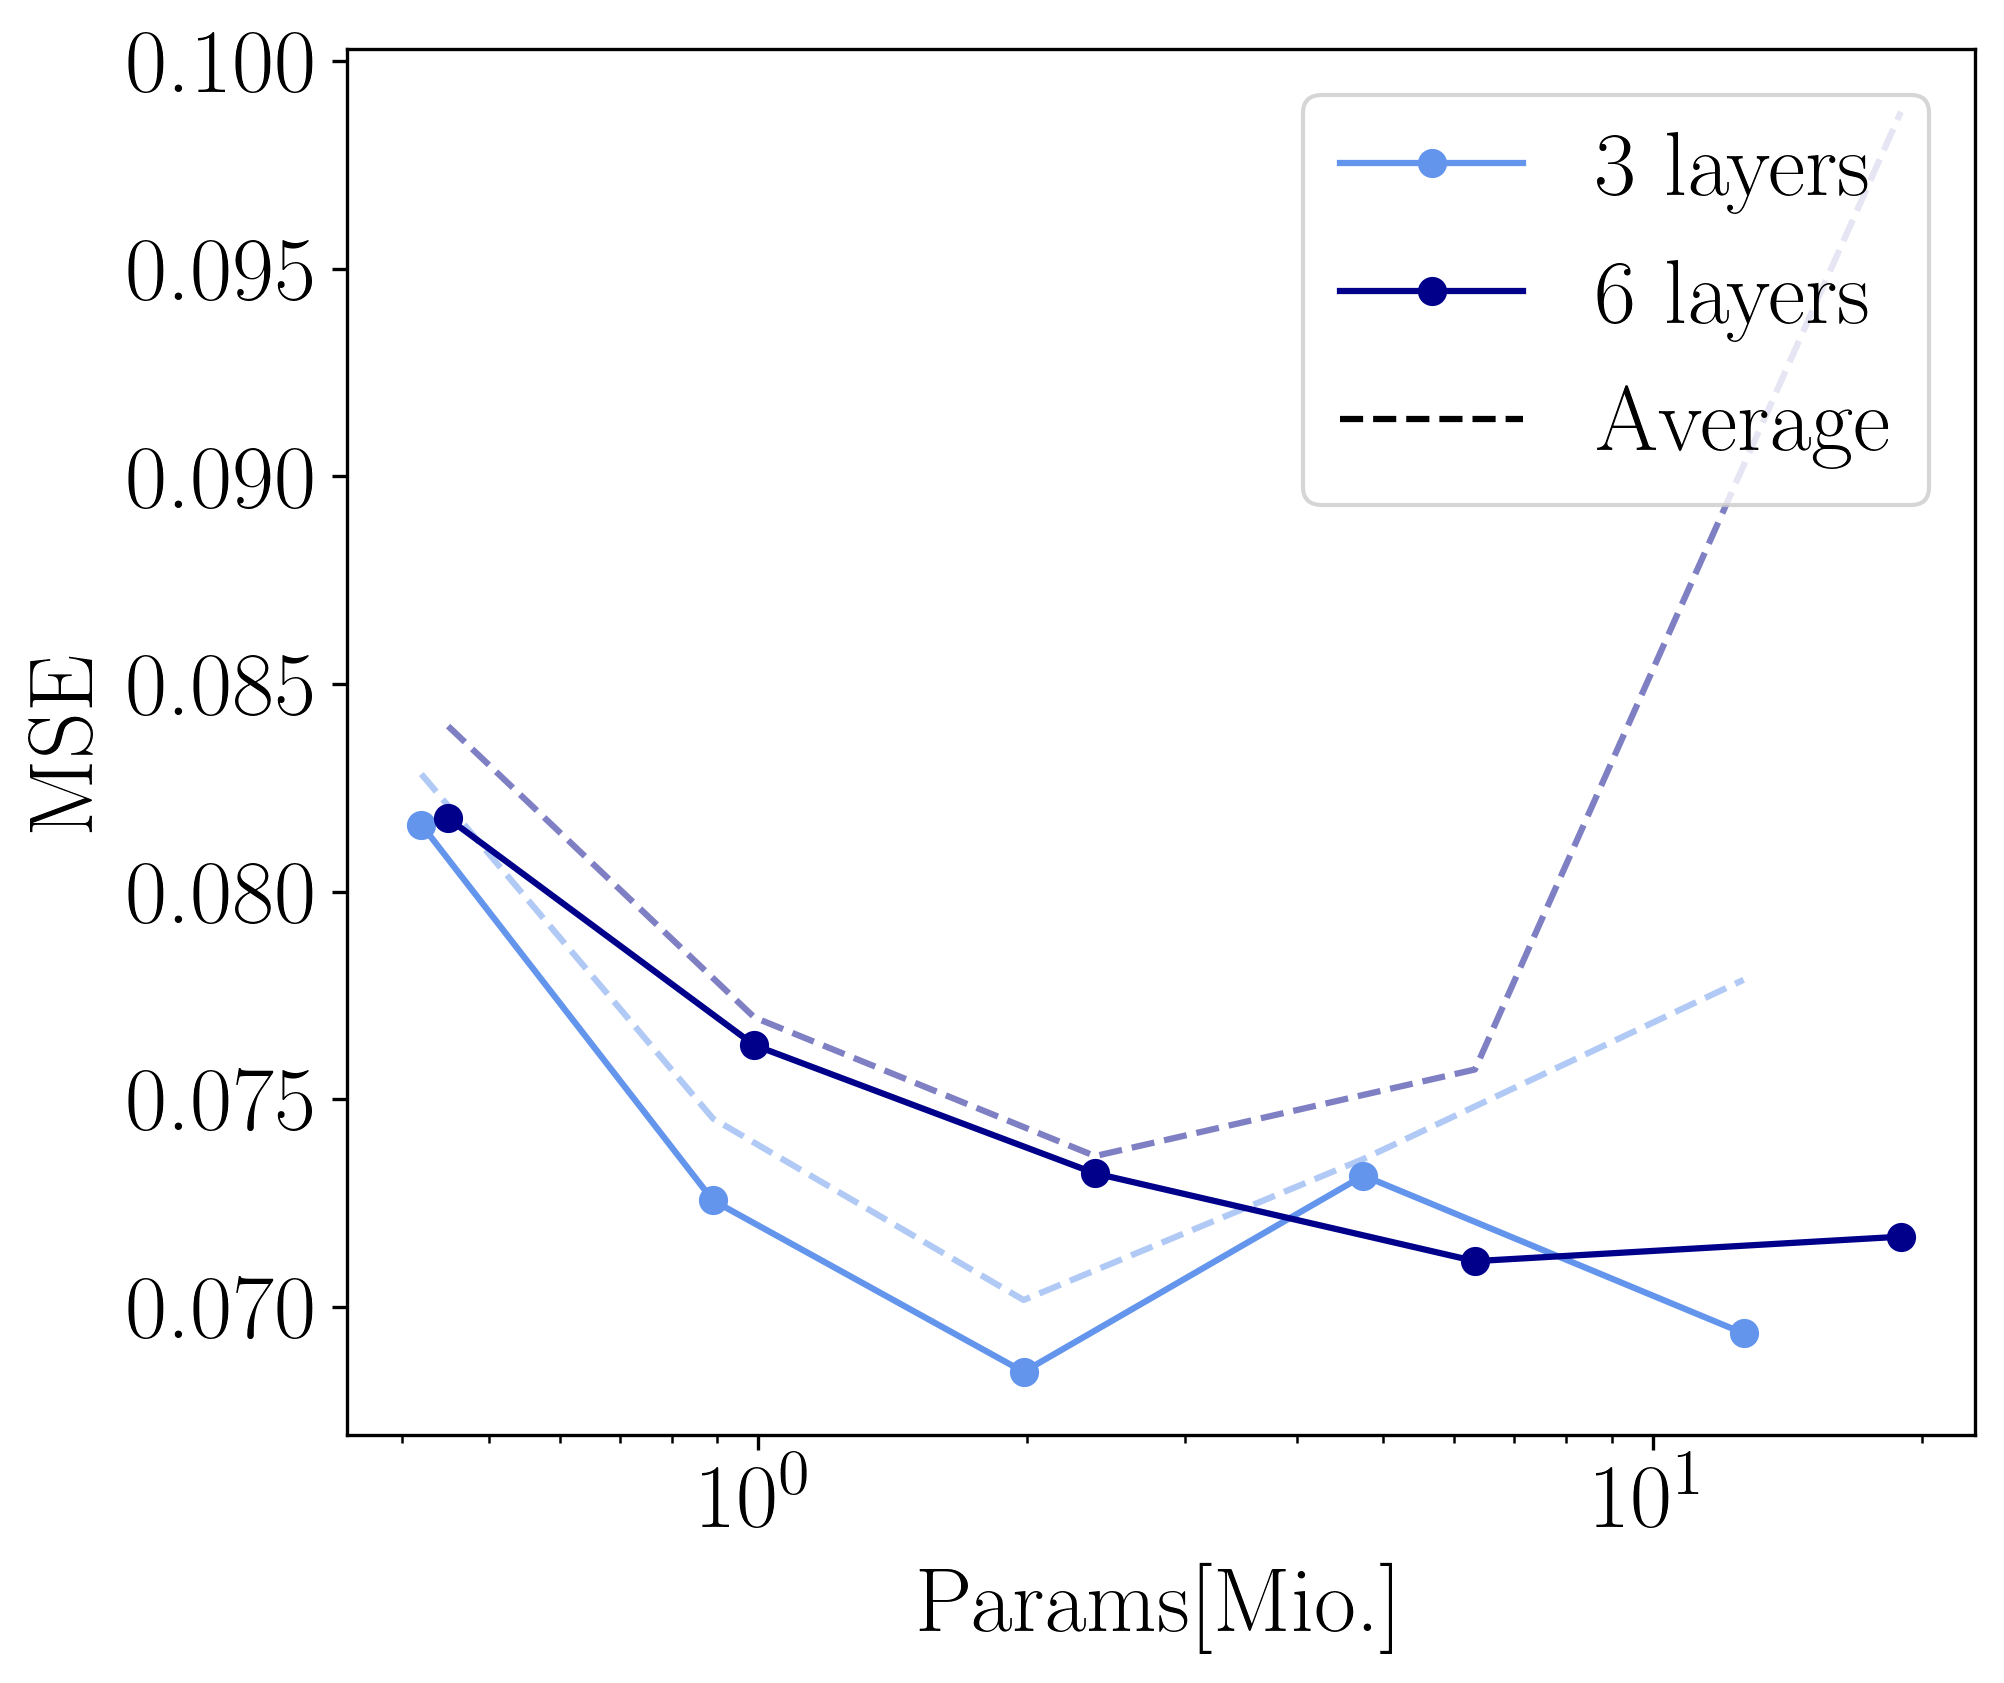

In [86]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==512].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==512].groupby(["e_layers", "Params[Mio.]"]).min()
#print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)
from matplotlib.ticker import FuncFormatter

colors = ["cornflowerblue", "darkblue", "deeppink"]

# Function to format the y-ticks
def ytick_format(value, _):
    return f'{value:.3f}'

# Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
for j, i in enumerate([3, 6]):
    print(i)
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers", color=colors[j], marker="o")
    # Dashed line
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], color=colors[j], linestyle="--", alpha=0.5)

# Add black dashed line for Average
ax.plot([], [], color='black', linestyle='--', label='Average')

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right", ncol=1)
ax.set_xscale("log")

# Set y-tick format
ax.yaxis.set_major_formatter(FuncFormatter(ytick_format))

plt.show()

In [87]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

learning_rate  batch_size  d_layers     d_model     seq_len  \
e_layers                                                                
3              0.000556        32.0       1.0  188.444444  443.555556   
6              0.000500        32.0       1.0  192.000000  449.142857   

          pred_len  dropout  weight_decay       MSE       MAE     Epochs  \
e_layers                                                                   
3            192.0      0.2           0.0  0.073187  0.190098  37.277778   
6            192.0      0.2           0.0  0.073856  0.190576  37.428571   

          Time[min]  Params[Mio.]  Max_mem[MB]  adamW  OneCycle  
e_layers                                                         
3         21.666667      3.390000   149.140000    0.0       1.0  
6         31.714286      4.865714   235.724286    0.0       1.0

In [88]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
45         0.0010          32         3         1      128      512       192   
29         0.0005          32         3         1      512      512       192   
25         0.0005          32         3         1      128      512       192   
37         0.0005          32         6         1      256      512       192   
44         0.0010          32         3         1      128      336       192   
46         0.0010          32         3         1      256      336       192   
19         0.0001          32         6         1      512      512       192   
36         0.0005          32         6         1      256      336       192   
54         0.0010          32         6         1      128      336       192   
5          0.0001          32         3         1      128      512       192   
43         0.0010          32         3         1       64      512       192   
17         0.0001          32         6         1      256      512       192   
52         0.0010          32         6         1       64      336       192   
26         0.0005          32         3         1      256      336       192   
23         0.0005          32         3         1       64      512       192   
27         0.0005          32         3         1      256      512       192   
35         0.0005          32         6         1      128      512       192   
9          0.0001          32         3         1      512      512       192   
47         0.0010          32         3         1      256      512       192   
15         0.0001          32         6         1      128      512       192   
7          0.0001          32         3         1      256      512       192   
34         0.0005          32         6         1      128      336       192   
55         0.0010          32         6         1      128      512       192   
42         0.0010          32         3         1       64      336       192   
18         0.0001          32         6         1      512      336       192   
22         0.0005          32         3         1       64      336       192   
53         0.0010          32         6         1       64      512       192   
24         0.0005          32         3         1      128      336       192   
4          0.0001          32         3         1      128      336       192   
13         0.0001          32         6         1       64      512       192   
33         0.0005          32         6         1       64      512       192   
3          0.0001          32         3         1       64      512       192   
8          0.0001          32         3         1      512      336       192   
14         0.0001          32         6         1      128      336       192   
2          0.0001          32         3         1       64      336       192   
6          0.0001          32         3         1      256      336       192   
28         0.0005          32         3         1      512      336       192   
32         0.0005          32         6         1       64      336       192   
1          0.0001          32         3         1       32      512       192   
31         0.0005          32         6         1       32      512       192   
11         0.0001          32         6         1       32      512       192   
16         0.0001          32         6         1      256      336       192   
57         0.0010          32         6         1      256      512       192   
12         0.0001          32         6         1       64      336       192   
21         0.0005          32         3         1       32      512       192   
41         0.0010          32         3         1       32      512       192   
20         0.0005          32         3         1       32      336       192   
10         0.0001          32         6         1       32      336       192   
51         0.0010          32      

In [89]:
sorted_df.tail(30)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
33         0.0005          32         6         1       64      512       192   
3          0.0001          32         3         1       64      512       192   
8          0.0001          32         3         1      512      336       192   
14         0.0001          32         6         1      128      336       192   
2          0.0001          32         3         1       64      336       192   
6          0.0001          32         3         1      256      336       192   
28         0.0005          32         3         1      512      336       192   
32         0.0005          32         6         1       64      336       192   
1          0.0001          32         3         1       32      512       192   
31         0.0005          32         6         1       32      512       192   
11         0.0001          32         6         1       32      512       192   
16         0.0001          32         6         1      256      336       192   
57         0.0010          32         6         1      256      512       192   
12         0.0001          32         6         1       64      336       192   
21         0.0005          32         3         1       32      512       192   
41         0.0010          32         3         1       32      512       192   
20         0.0005          32         3         1       32      336       192   
10         0.0001          32         6         1       32      336       192   
51         0.0010          32         6         1       32      512       192   
56         0.0010          32         6         1      256      336       192   
50         0.0010          32         6         1       32      336       192   
30         0.0005          32         6         1       32      336       192   
49         0.0010          32         3         1      512      512       192   
0          0.0001          32         3         1       32      336       192   
40         0.0010          32         3         1       32      336       192   
48         0.0010          32         3         1      512      336       192   
59         0.0010          32         6         1      512      512       192   
39         0.0005          32         6         1      512      512       192   
38         0.0005          32         6         1      512      336       192   
58         0.0010          32         6         1      512      336       192   

    dropout  weight_decay       MSE       MAE  Epochs  Time[min]  \
33      0.2           0.0  0.077383  0.196148      21         17   
3       0.2           0.0  0.077913  0.193048      44         24   
8       0.2           0.0  0.080429  0.197003      50         32   
14      0.2           0.0  0.080470  0.200804      25         20   
2       0.2           0.0  0.081028  0.196030      50         25   
6       0.2           0.0  0.081364  0.199632      33         19   
28      0.2           0.0  0.081404  0.200281      23         14   
32      0.2           0.0  0.081501  0.197568      23         19   
1       0.2           0.0  0.081614  0.195270      47         24   
31      0.2           0.0  0.081764  0.198164      23         17   
11      0.2           0.0  0.081842  0.198501      43         35   
16      0.2           0.0  0.082924  0.200040      36         29   
57      0.2           0.0  0.083196  0.207794      15         13   
12      0.2           0.0  0.083362  0.200560      43         35   
21      0.2           0.0  0.083430  0.200118      24         13   
41      0.2           0.0  0.083450  0.197936      39         21   
20      0.2           0.0  0.087930  0.205975      28         14   
10      0.2           0.0  0.088119  0.201667      46         36   
51      0.2           0.0  0.088351  0.206079      18         13   
56      0.2           0.0  0.088465  0.210487      15         12   
50      0.2           0.0  0.088632  0.205954      20         14

In [90]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(6)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

Lr  D. model  Enc. layers  OneCycle  Params[Mio.]  Epochs  \
Mean Top10  0.000620       243            4       1.0          5.60      40   
Std Top10   0.000361       153            1       0.0          5.80       8   
58          0.001000       512            6       1.0         16.78      11   
45          0.001000       128            3       1.0          1.98      29   
29          0.000500       512            3       1.0         12.64      41   
25          0.000500       128            3       1.0          1.98      27   

                 MSE  Seq. len.  adamW  dropout  weight_decay  
Mean Top10  0.071000        441    0.0      0.2           0.0  
Std Top10   0.001355         90    0.0      0.0           0.0  
58          0.131049        336    0.0      0.2           0.0  
45          0.068434        512    0.0      0.2           0.0  
29          0.069363        512    0.0      0.2           0.0  
25          0.069687        512    0.0      0.2           0.0

In [91]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0684339702129364

## Params[Mio.] vs MSE

In [92]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
20         0.0005          32         3         1       32      336       192   
0          0.0001          32         3         1       32      336       192   
40         0.0010          32         3         1       32      336       192   
10         0.0001          32         6         1       32      336       192   
50         0.0010          32         6         1       32      336       192   
30         0.0005          32         6         1       32      336       192   
1          0.0001          32         3         1       32      512       192   
21         0.0005          32         3         1       32      512       192   
41         0.0010          32         3         1       32      512       192   
31         0.0005          32         6         1       32      512       192   
11         0.0001          32         6         1       32      512       192   
51         0.0010          32         6         1       32      512       192   
42         0.0010          32         3         1       64      336       192   
22         0.0005          32         3         1       64      336       192   
2          0.0001          32         3         1       64      336       192   
52         0.0010          32         6         1       64      336       192   
32         0.0005          32         6         1       64      336       192   
12         0.0001          32         6         1       64      336       192   
43         0.0010          32         3         1       64      512       192   
23         0.0005          32         3         1       64      512       192   
3          0.0001          32         3         1       64      512       192   
53         0.0010          32         6         1       64      512       192   
13         0.0001          32         6         1       64      512       192   
33         0.0005          32         6         1       64      512       192   
44         0.0010          32         3         1      128      336       192   
24         0.0005          32         3         1      128      336       192   
4          0.0001          32         3         1      128      336       192   
54         0.0010          32         6         1      128      336       192   
34         0.0005          32         6         1      128      336       192   
14         0.0001          32         6         1      128      336       192   
45         0.0010          32         3         1      128      512       192   
25         0.0005          32         3         1      128      512       192   
5          0.0001          32         3         1      128      512       192   
35         0.0005          32         6         1      128      512       192   
15         0.0001          32         6         1      128      512       192   
55         0.0010          32         6         1      128      512       192   
46         0.0010          32         3         1      256      336       192   
26         0.0005          32         3         1      256      336       192   
6          0.0001          32         3         1      256      336       192   
27         0.0005          32         3         1      256      512       192   
47         0.0010          32         3         1      256      512       192   
7          0.0001          32         3         1      256      512       192   
36         0.0005          32         6         1      256      336       192   
16         0.0001          32         6         1      256      336       192   
56         0.0010          32         6         1      256      336       192   
37         0.0005          32         6         1      256      512       192   
17         0.0001          32         6         1      256      512       192   
57         0.0010          32         6         1      256      512       192   
8          0.0001          32      

In [93]:
hpo_table[hpo_table["adamW"] == 0]

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
20         0.0005          32         3         1       32      336       192   
0          0.0001          32         3         1       32      336       192   
40         0.0010          32         3         1       32      336       192   
10         0.0001          32         6         1       32      336       192   
50         0.0010          32         6         1       32      336       192   
30         0.0005          32         6         1       32      336       192   
1          0.0001          32         3         1       32      512       192   
21         0.0005          32         3         1       32      512       192   
41         0.0010          32         3         1       32      512       192   
31         0.0005          32         6         1       32      512       192   
11         0.0001          32         6         1       32      512       192   
51         0.0010          32         6         1       32      512       192   
42         0.0010          32         3         1       64      336       192   
22         0.0005          32         3         1       64      336       192   
2          0.0001          32         3         1       64      336       192   
52         0.0010          32         6         1       64      336       192   
32         0.0005          32         6         1       64      336       192   
12         0.0001          32         6         1       64      336       192   
43         0.0010          32         3         1       64      512       192   
23         0.0005          32         3         1       64      512       192   
3          0.0001          32         3         1       64      512       192   
53         0.0010          32         6         1       64      512       192   
13         0.0001          32         6         1       64      512       192   
33         0.0005          32         6         1       64      512       192   
44         0.0010          32         3         1      128      336       192   
24         0.0005          32         3         1      128      336       192   
4          0.0001          32         3         1      128      336       192   
54         0.0010          32         6         1      128      336       192   
34         0.0005          32         6         1      128      336       192   
14         0.0001          32         6         1      128      336       192   
45         0.0010          32         3         1      128      512       192   
25         0.0005          32         3         1      128      512       192   
5          0.0001          32         3         1      128      512       192   
35         0.0005          32         6         1      128      512       192   
15         0.0001          32         6         1      128      512       192   
55         0.0010          32         6         1      128      512       192   
46         0.0010          32         3         1      256      336       192   
26         0.0005          32         3         1      256      336       192   
6          0.0001          32         3         1      256      336       192   
27         0.0005          32         3         1      256      512       192   
47         0.0010          32         3         1      256      512       192   
7          0.0001          32         3         1      256      512       192   
36         0.0005          32         6         1      256      336       192   
16         0.0001          32         6         1      256      336       192   
56         0.0010          32         6         1      256      336       192   
37         0.0005          32         6         1      256      512       192   
17         0.0001          32         6         1      256      512       192   
57         0.0010          32         6         1      256      512       192   
8          0.0001          32      

In [94]:
hpo_table.tail(10)

learning_rate  batch_size  e_layers  d_layers  d_model  seq_len  pred_len  \
48         0.0010          32         3         1      512      336       192   
29         0.0005          32         3         1      512      512       192   
9          0.0001          32         3         1      512      512       192   
49         0.0010          32         3         1      512      512       192   
18         0.0001          32         6         1      512      336       192   
38         0.0005          32         6         1      512      336       192   
58         0.0010          32         6         1      512      336       192   
19         0.0001          32         6         1      512      512       192   
59         0.0010          32         6         1      512      512       192   
39         0.0005          32         6         1      512      512       192   

    dropout  weight_decay       MSE       MAE  Epochs  Time[min]  \
48      0.2           0.0  0.105554  0.228862      16         10   
29      0.2           0.0  0.069363  0.185215      41         33   
9       0.2           0.0  0.073321  0.191112      43         28   
49      0.2           0.0  0.090939  0.214687      15         11   
18      0.2           0.0  0.075100  0.190199      50         45   
38      0.2           0.0  0.119565  0.245414      11         12   
58      0.2           0.0  0.131049  0.261156      11         12   
19      0.2           0.0  0.071689  0.189111      33         32   
59      0.2           0.0  0.112234  0.235076      36         53   
39      0.2           0.0  0.112419  0.241837      16         23   

    Params[Mio.]  Max_mem[MB]  adamW  OneCycle  
48         10.47       333.16      0         1  
29         12.64       429.07      0         1  
9          12.64       429.07      0         1  
49         12.64       429.07      0         1  
18         16.78       524.62      0         1  
38         16.78       523.70      0         1  
58         16.78       523.70      0         1  
19         18.95       684.31      0         1  
59         18.95       684.31      0         1  
39         18.95       684.31      0         1

In [95]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model", "dropout", "weight_decay", "OneCycle", "adamW"]]
print(reduced_hpo_table.shape)

(60, 11)


In [96]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(14, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.1  # add 5% padding below and above
    ymaxs += dys * 0.1
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00002
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00002, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="8%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


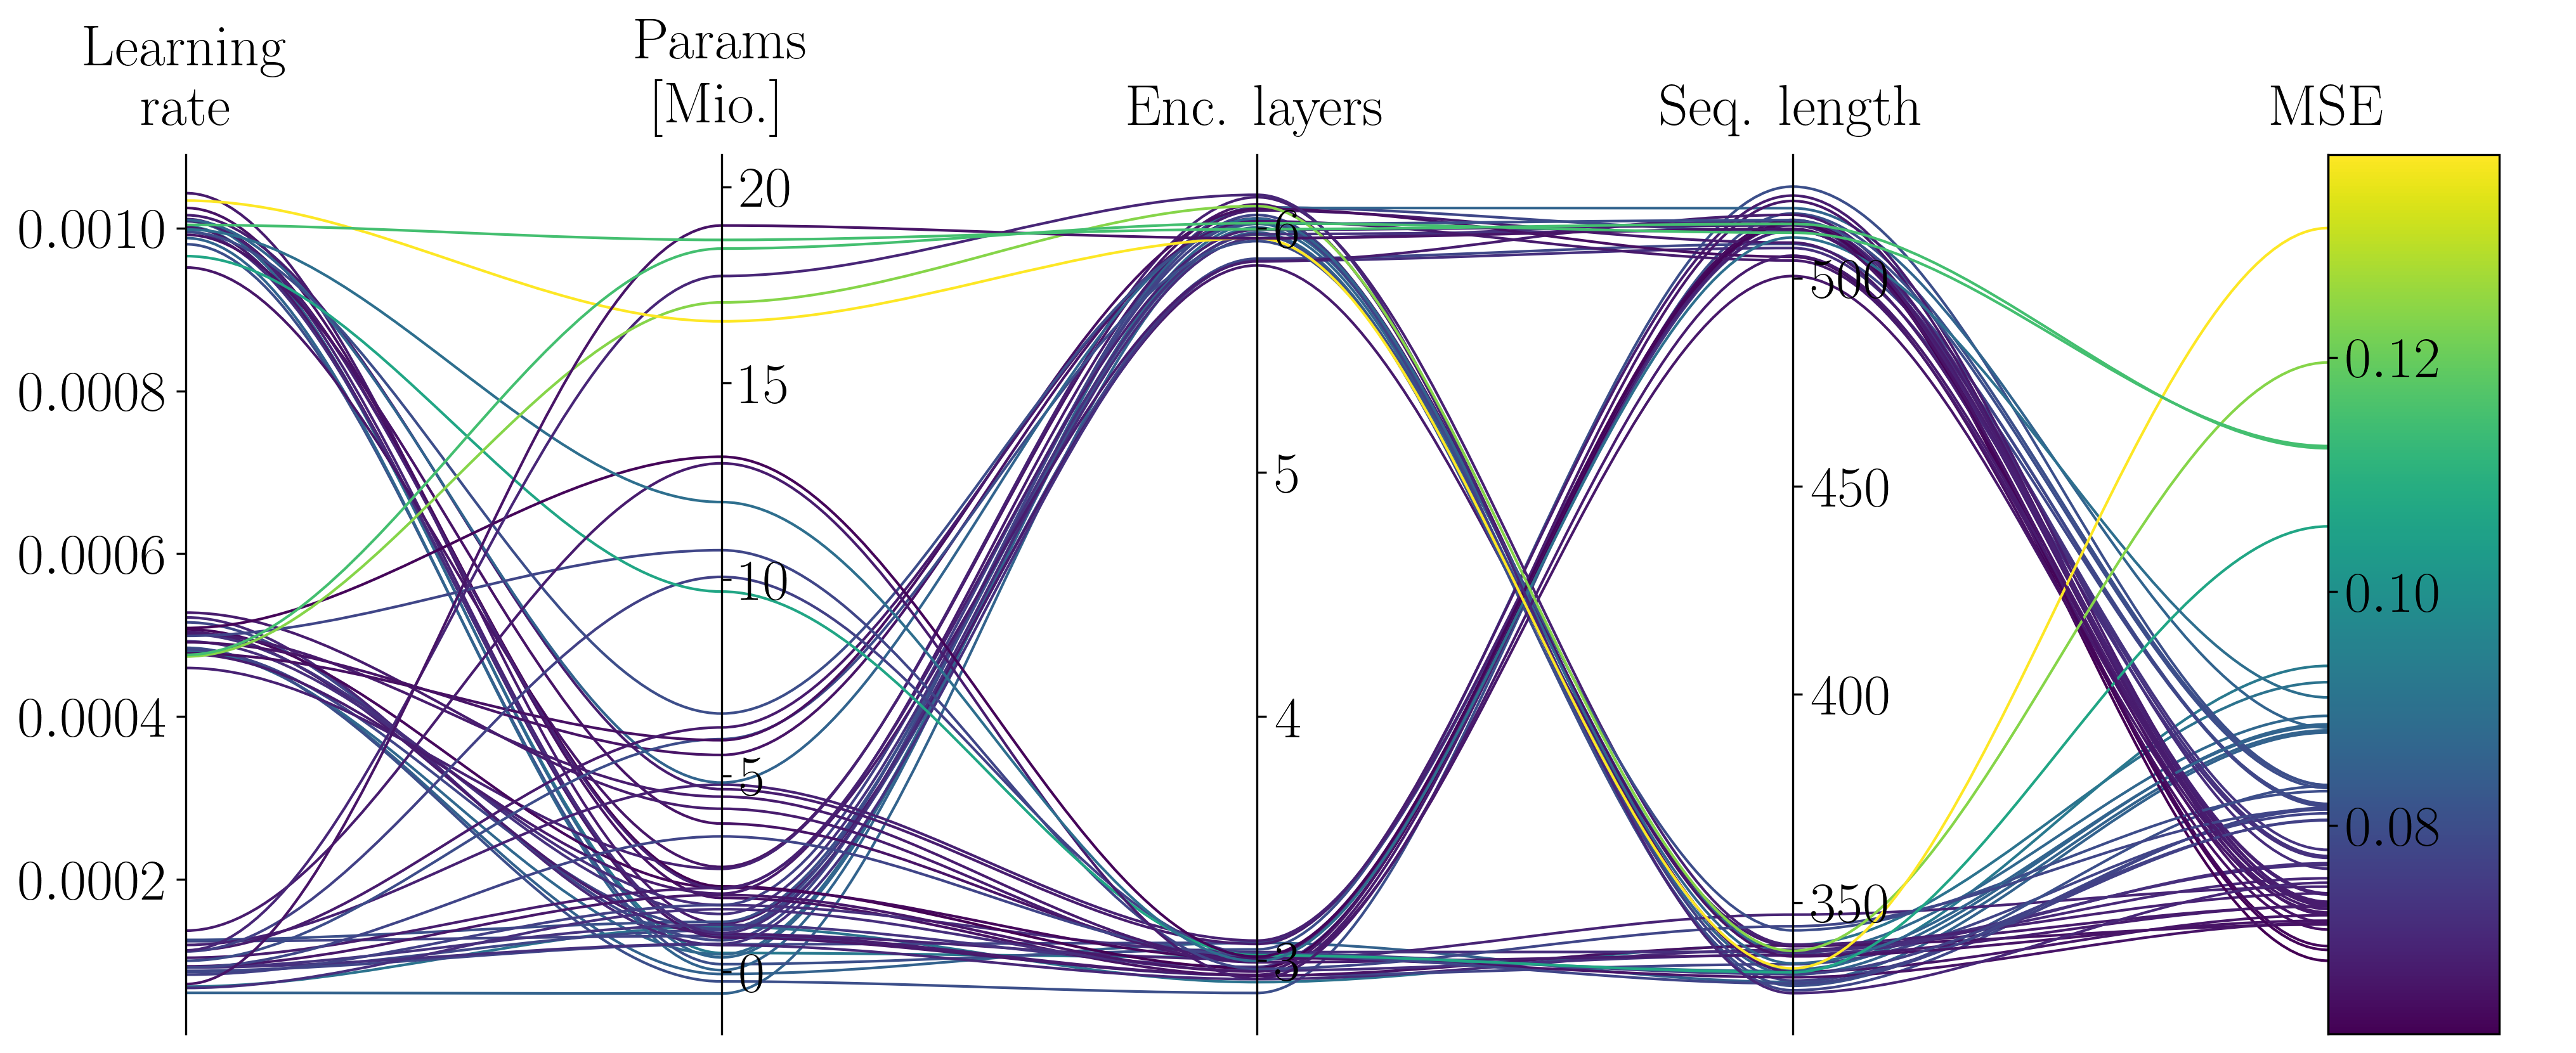

In [97]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "e_layers", "seq_len", "MSE"], ynames=["Learning \n rate", "Params \n [Mio.]", "Enc. layers", "Seq. length", "MSE"])

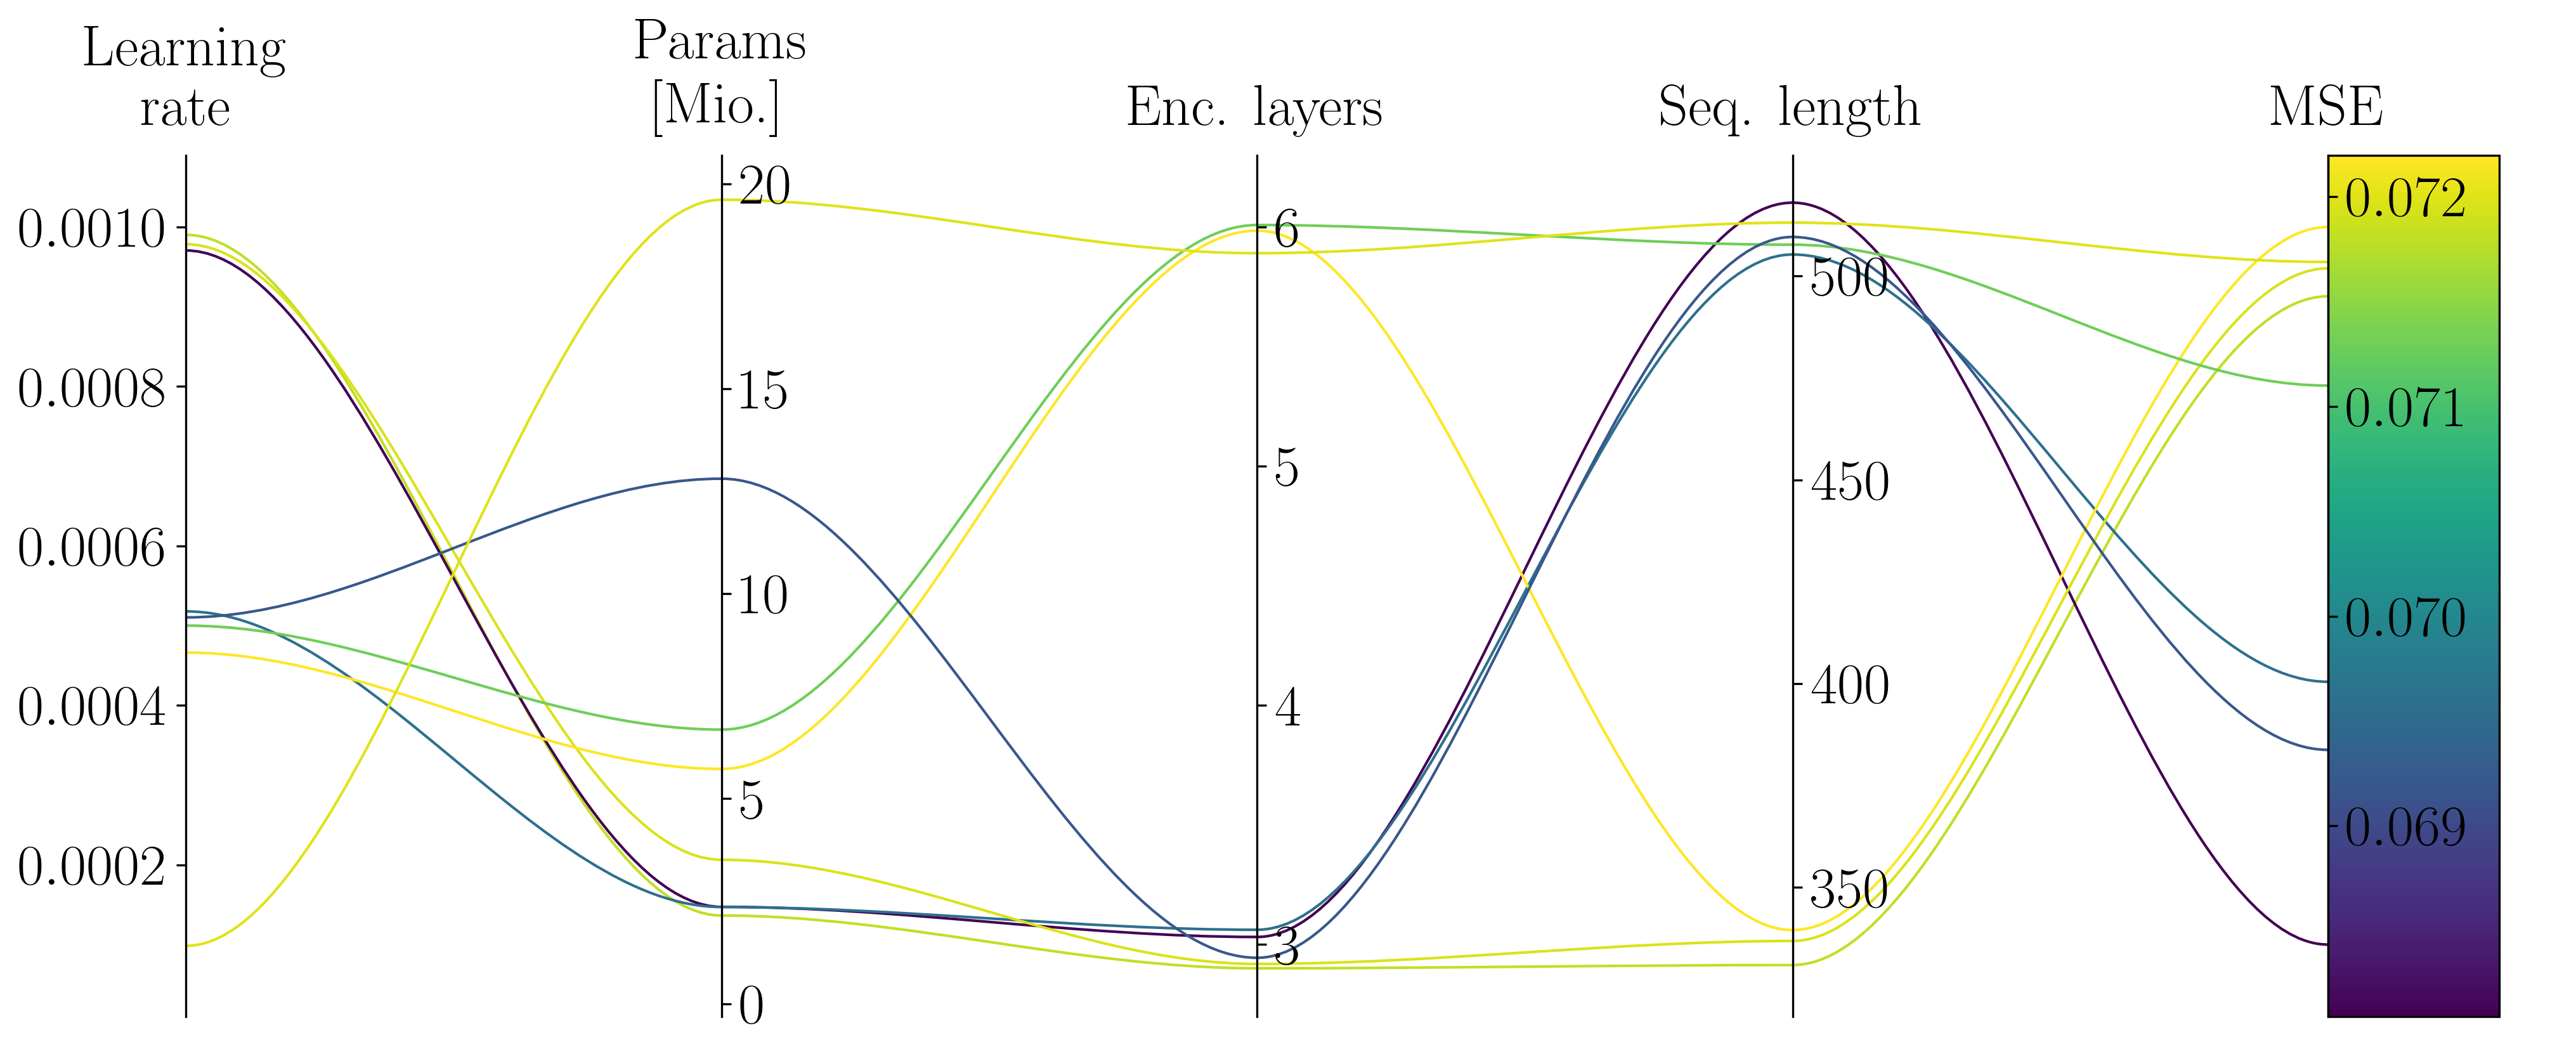

In [98]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "e_layers", "seq_len", "MSE"], threshold=0.072, ynames=["Learning \n rate", "Params \n [Mio.]", "Enc. layers", "Seq. length", "MSE"])

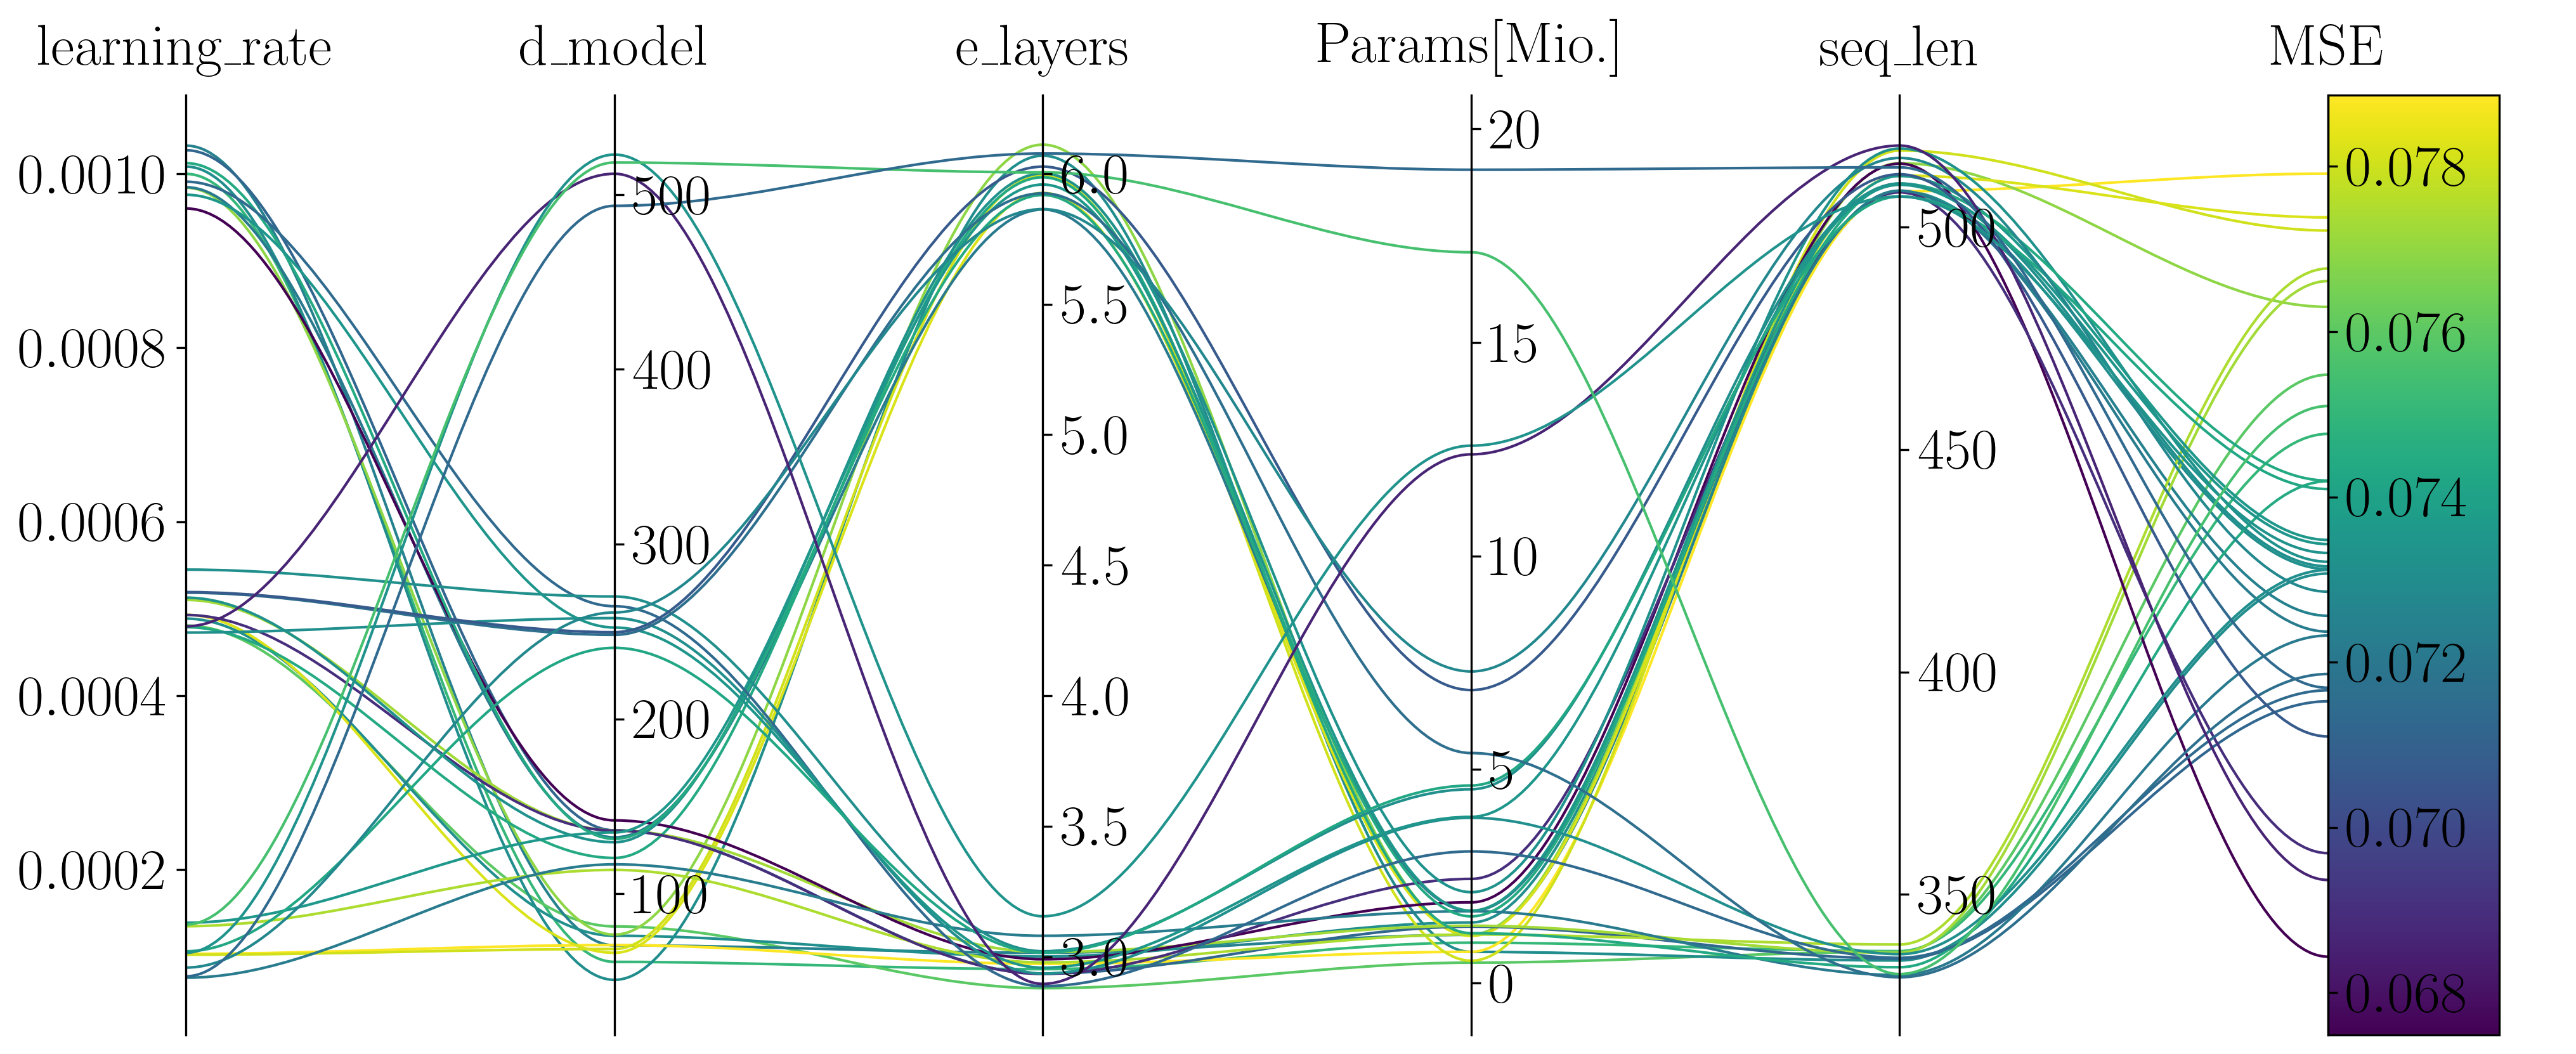

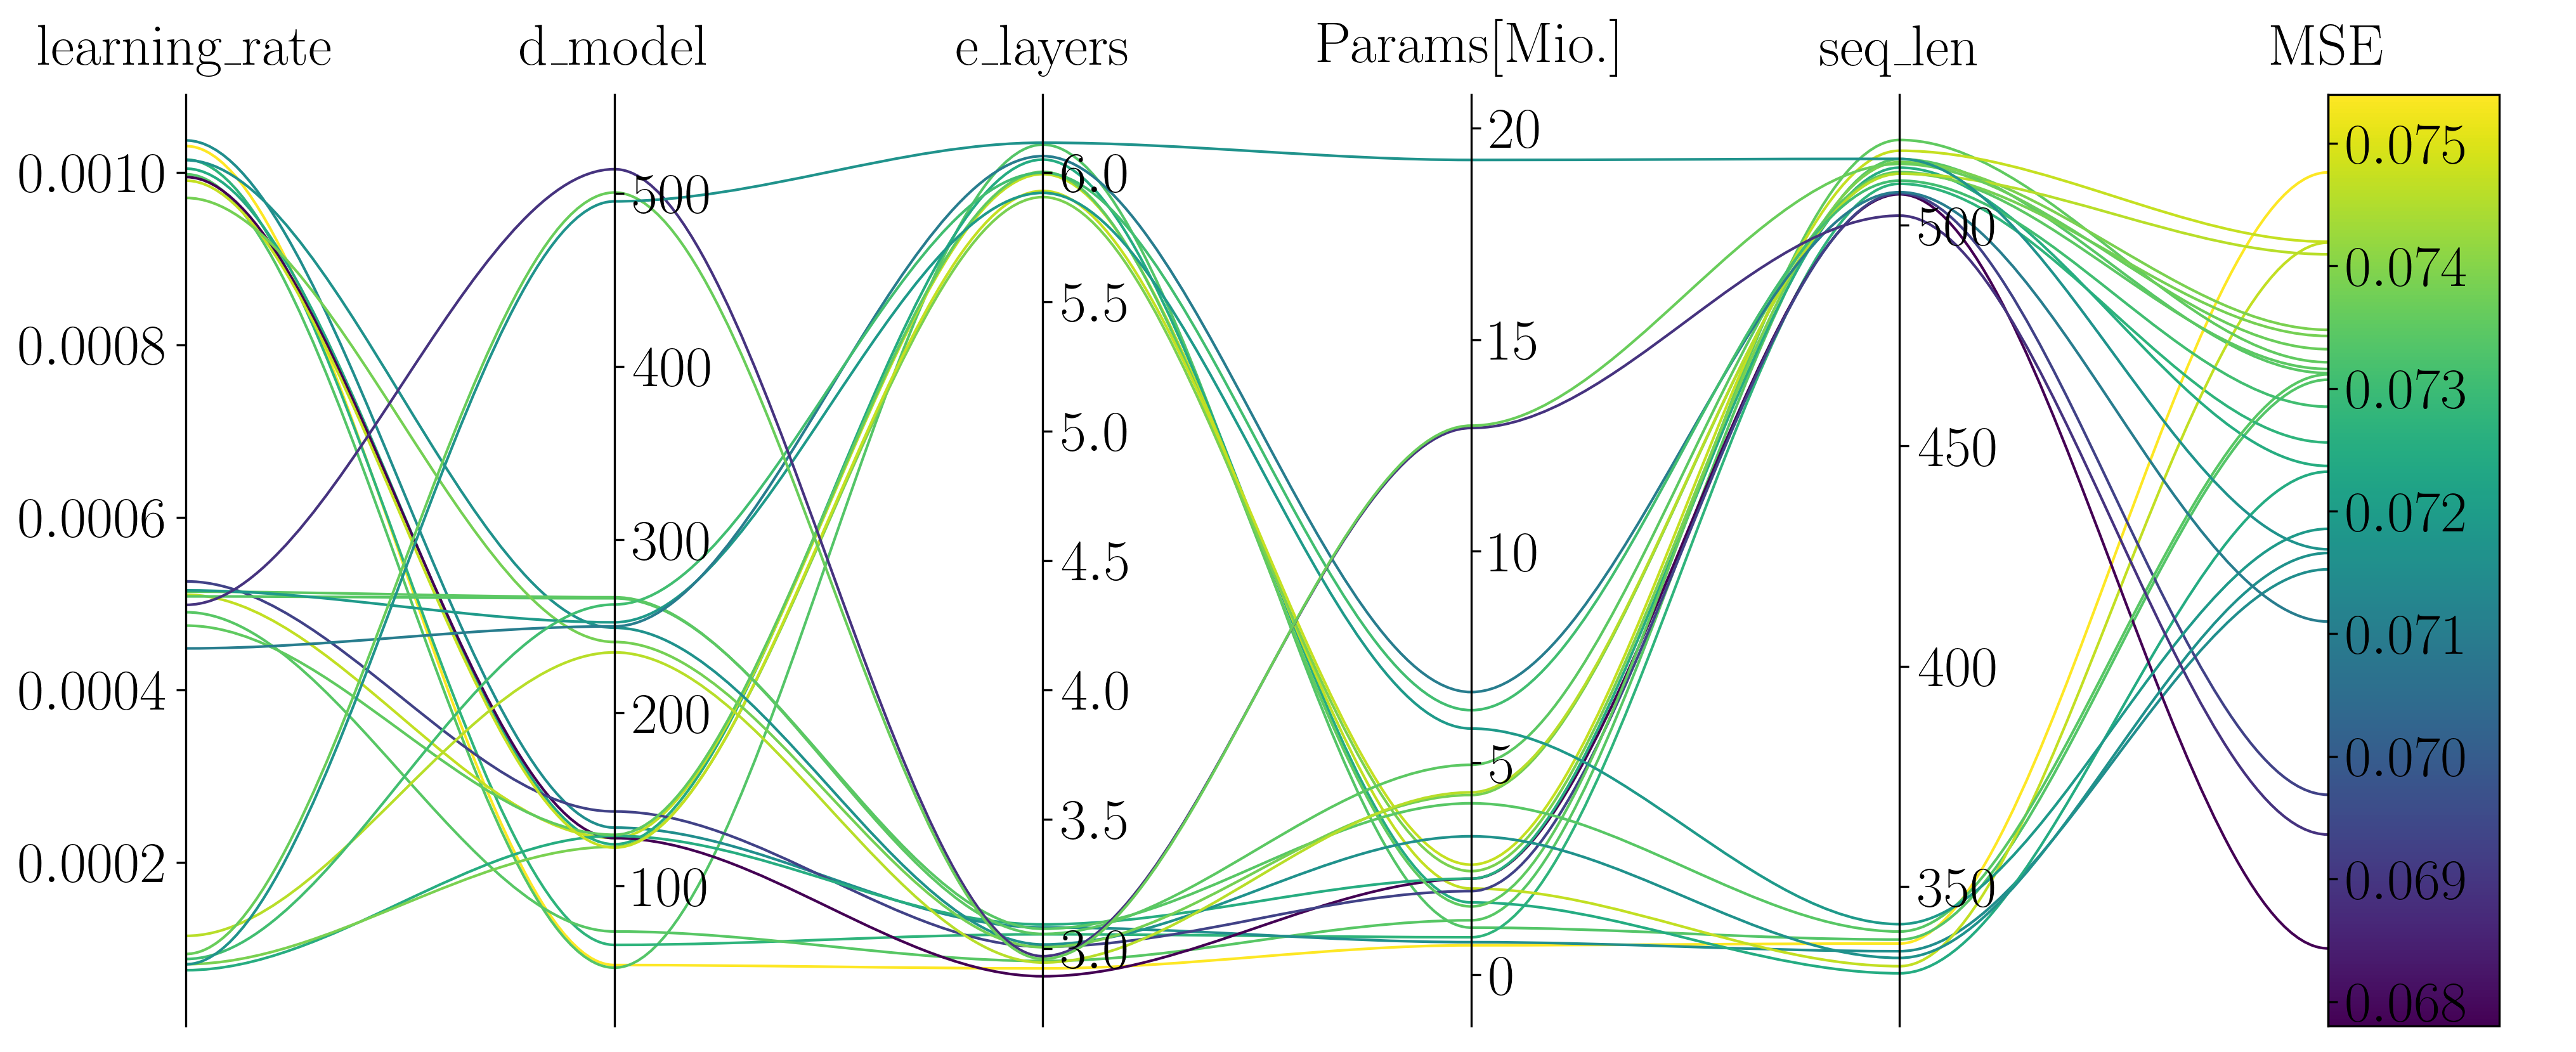

In [99]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.075)

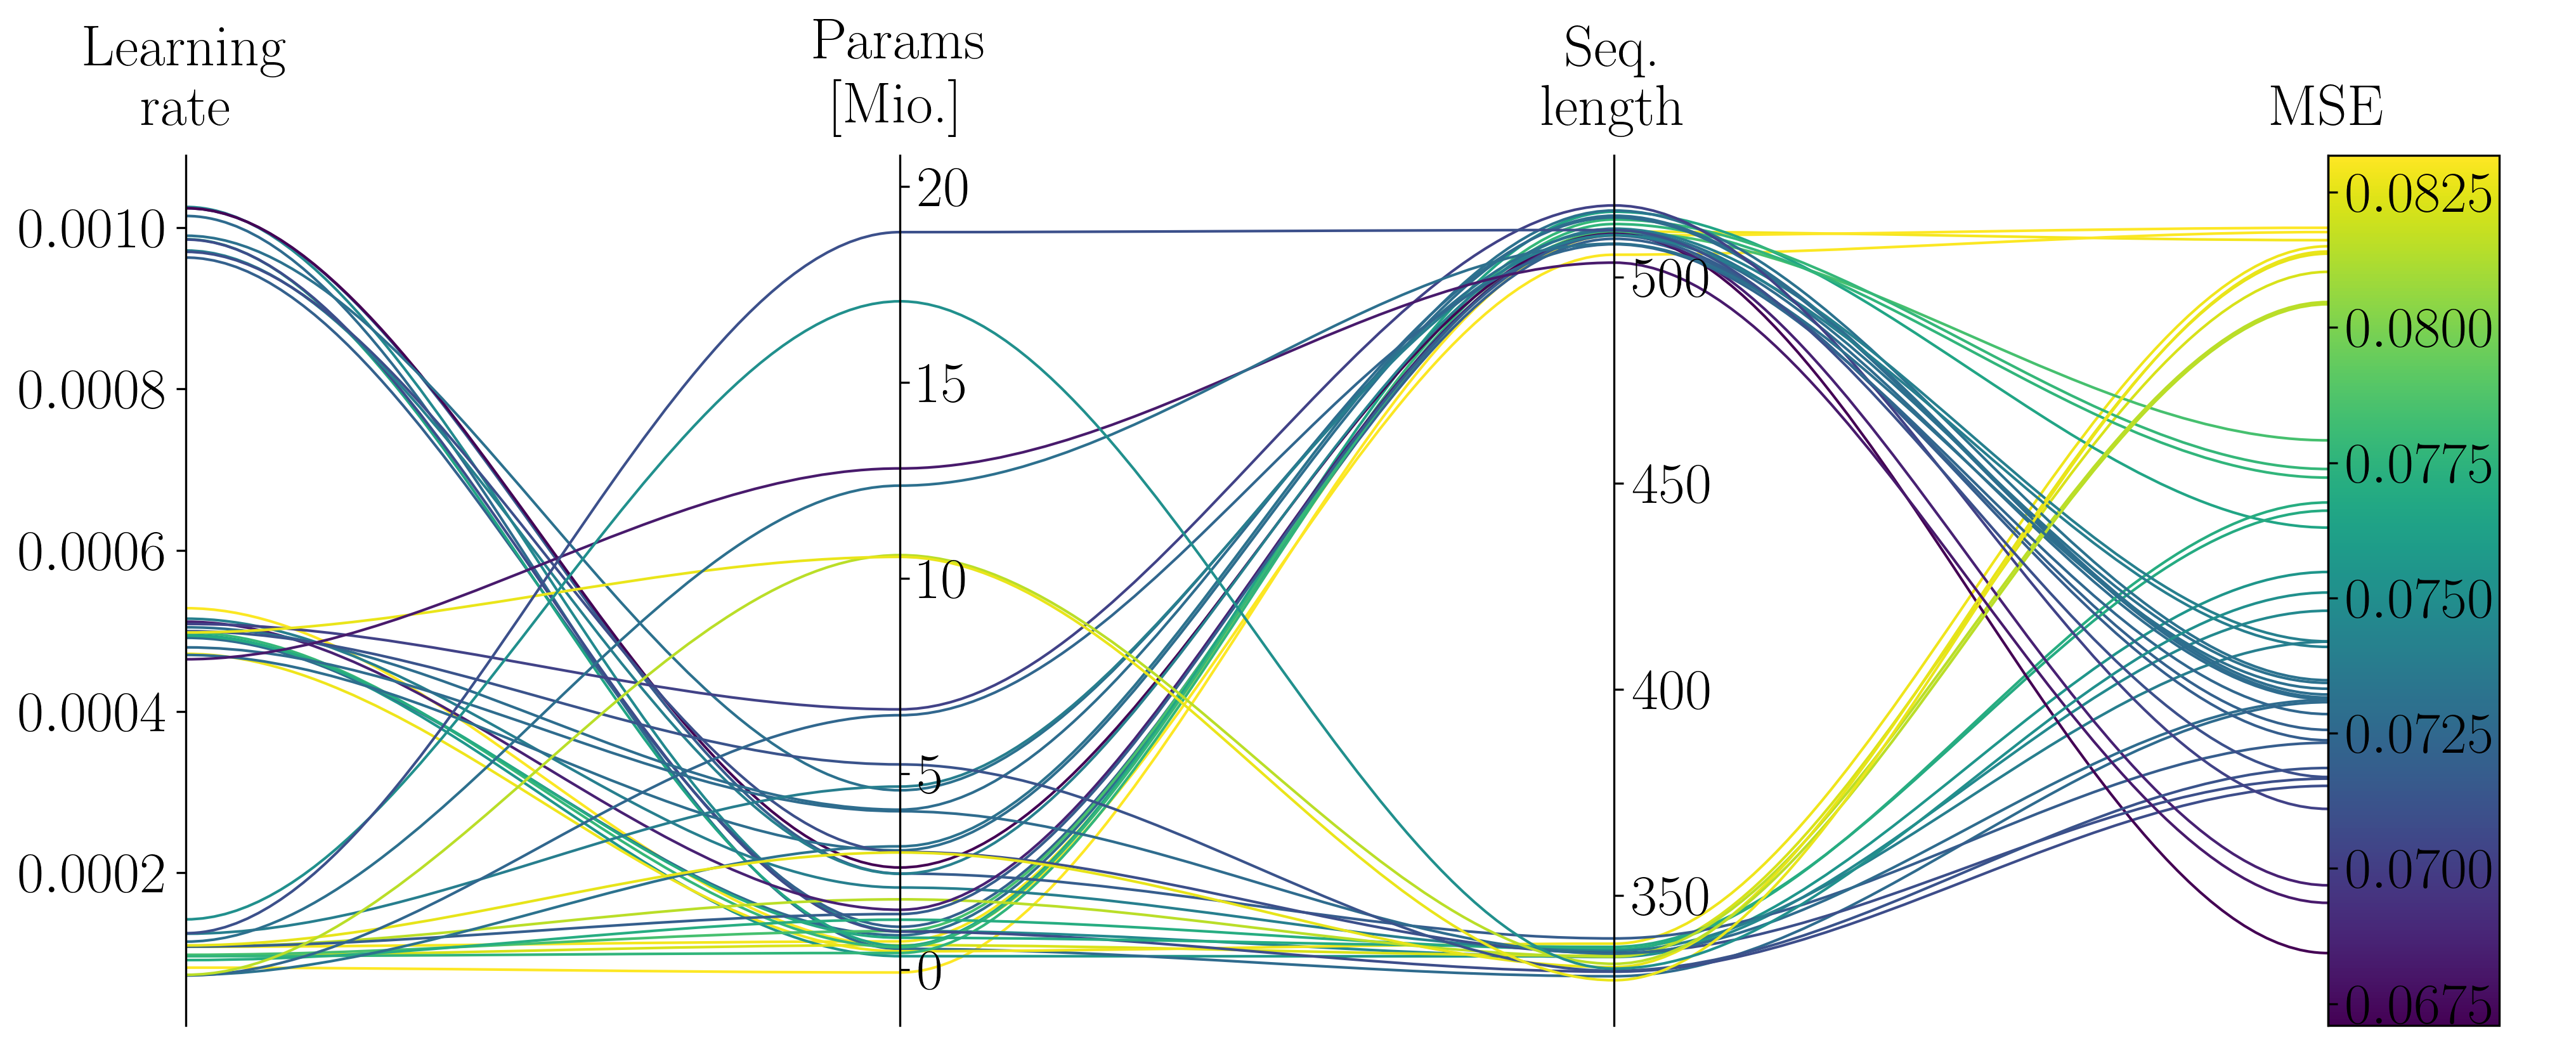

In [100]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "seq_len", "MSE"], threshold=best_mse * 1.2, ynames=["Learning \n rate", "Params \n [Mio.]", "Seq. \n length", "MSE"])